In [ ]:
# %%capture
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
X_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
a=Y_df['unique_id'].unique()
a.size

862

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,0,-0.711224,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 02:00:00,1,-0.643331,-0.413043,0.166667,-0.500000,-0.00137
2,2016-07-01 02:00:00,2,-0.925668,-0.413043,0.166667,-0.500000,-0.00137
3,2016-07-01 02:00:00,3,-1.182531,-0.413043,0.166667,-0.500000,-0.00137
4,2016-07-01 02:00:00,4,-0.569992,-0.413043,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
15122923,2018-07-02 01:00:00,857,-0.311380,-0.456522,-0.500000,-0.466667,-0.00137
15122924,2018-07-02 01:00:00,858,-2.129480,-0.456522,-0.500000,-0.466667,-0.00137
15122925,2018-07-02 01:00:00,859,-1.582374,-0.456522,-0.500000,-0.466667,-0.00137
15122926,2018-07-02 01:00:00,860,-0.555770,-0.456522,-0.500000,-0.466667,-0.00137


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
# filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

Y_df=filtered_df
Y_df

/tmp/ipykernel_32544/809827270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])


,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df.shape

(17544, 7)

## AutoImformr Horizon = 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17448,:]
Y_test_df = Y_df.iloc[17448:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=96,
                 input_size=24,
                 max_steps=250,
                 )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
290 K     Total params
1.162     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=250` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,-1.738647
OT,1,-1.860889
OT,2,-1.884678
OT,3,-1.751507
OT,4,-1.490955
...,...,...
OT,91,1.451531
OT,92,0.767323
OT,93,0.445393


<Axes: xlabel='ds'>

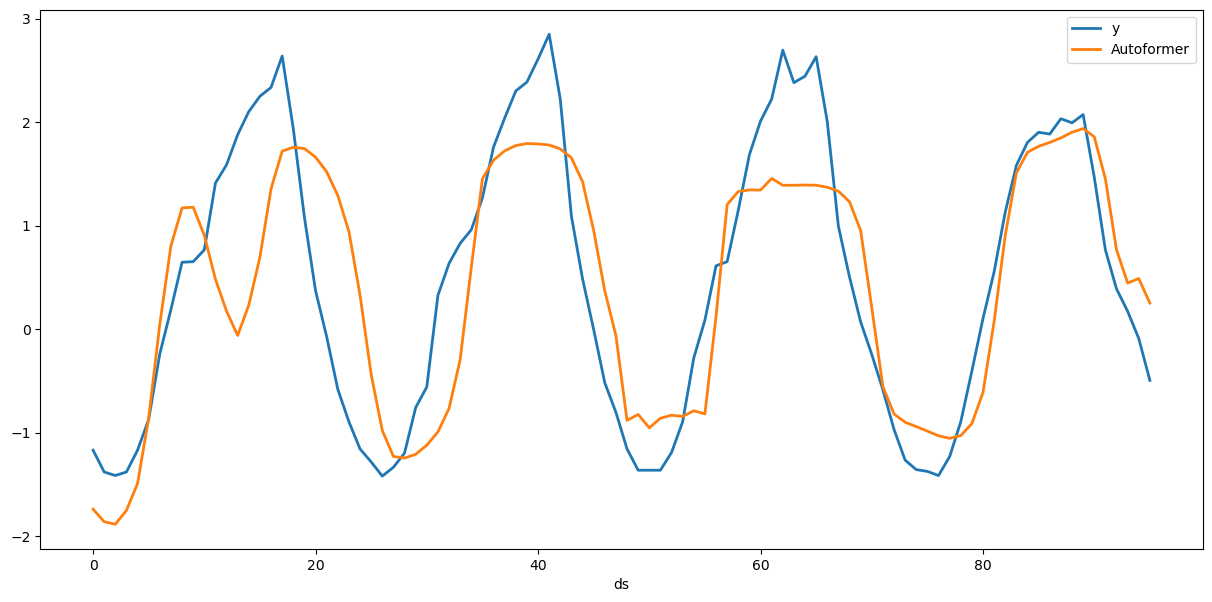

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.622
Autoformer MSE: 0.600


## Horizon = 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17352,:]
Y_test_df = Y_df.iloc[17352:,:]
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
17352,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
17353,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
17354,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
17355,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
17356,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
1,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
2,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
3,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
4,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
188,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
189,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
190,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=192,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=250,
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-21 07:36:04.508629: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 07:36:04.731566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,-2.277818
OT,1,-1.865978
OT,2,-0.827561
OT,3,0.160129
OT,4,0.801930
...,...,...
OT,187,1.599189
OT,188,1.276369
OT,189,-0.404341


<Axes: xlabel='ds'>

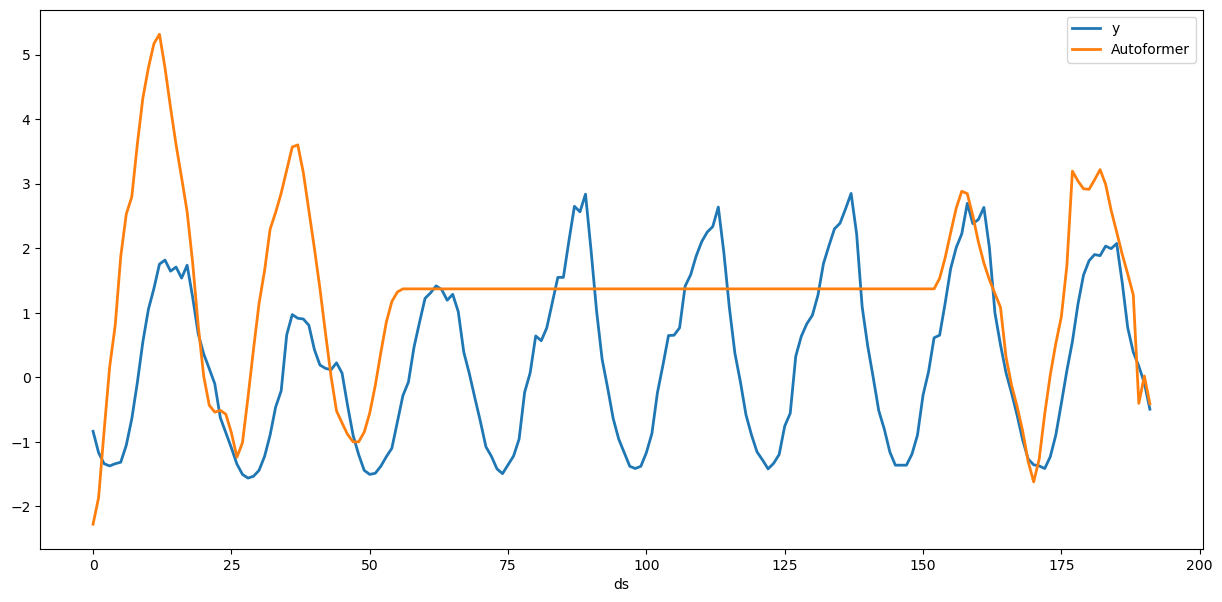

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 1.332
Autoformer MSE: 2.782


## Horizon 336

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:17208,:]
Y_test_df = Y_df.iloc[17208:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=336,
                 input_size=24,
                #  hidden_size = 16,
                #  conv_hidden_size = 32,
                #  n_head=2,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=250,
                #  val_check_steps=50,
                #  early_stop_patience_steps=2
                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:16824,:]
Y_test_df = Y_df.iloc[16824:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=720,
                 input_size=24,
                #  hidden_size = 16,
                #  conv_hidden_size = 32,
                #  n_head=2,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=250,
                #  val_check_steps=50,
                #  early_stop_patience_steps=2
                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')